### Workshop - Decision Trees

This workshop deals with understanding the working of decision trees.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Now let us define the Decision Tree Algorithm

In [22]:
df = pd.read_csv(r'C:\Users\rakhipurwar\seaborn-data\iris.csv')

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Let us visualize the Decision Tree to understand it better.



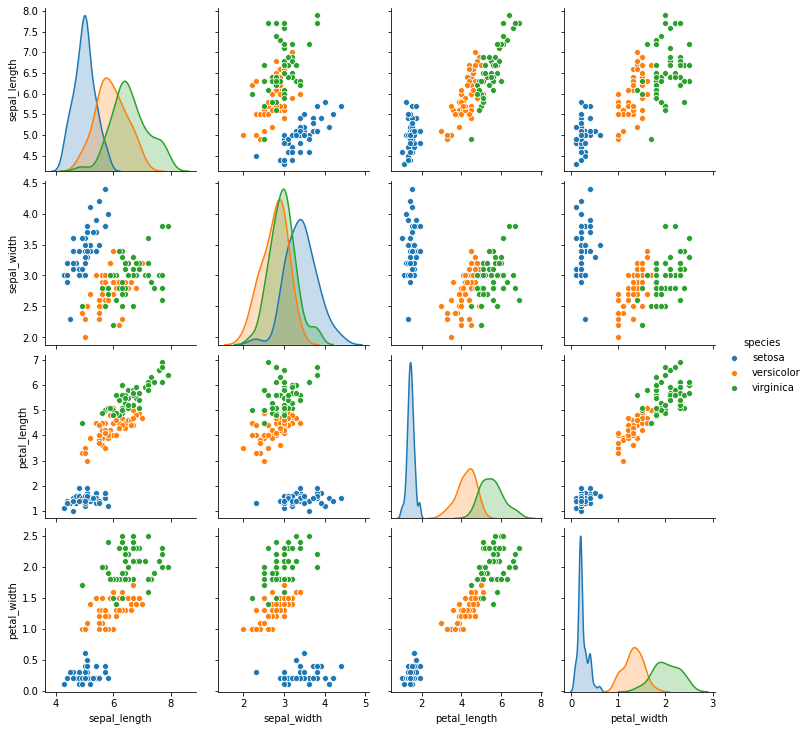

In [35]:
sns.pairplot(df,hue = 'species',kind = 'scatter')

In [30]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(df)
design_report.to_file(output_file='iris eda.html')

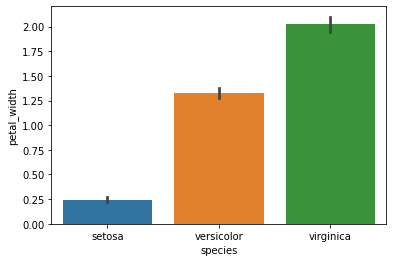

In [36]:
sns.barplot(y = df['petal_width'],x= df['species'])
plt.show()

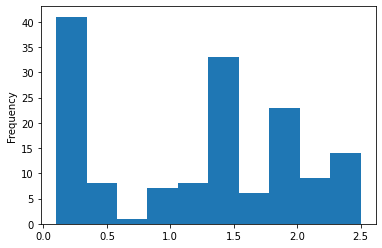

In [39]:
df['petal_width'].plot.hist()
plt.show()

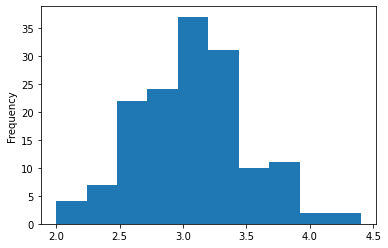

In [40]:
df['sepal_width'].plot.hist()
plt.show()

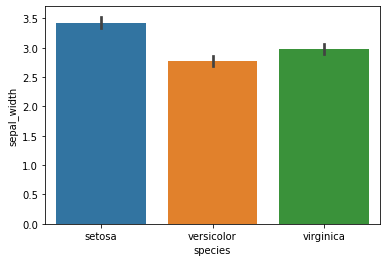

In [41]:
sns.barplot(y = df['sepal_width'],x= df['species'])
plt.show()

In [43]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [48]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
pred = dtree.predict(X_test)

In [53]:
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

[['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['virginica' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']]


[Text(413.3333333333333, 830.5, 'petal length (cm) <= 2.45\ngini = 0.664\nsamples = 120\nvalue = [44, 35, 41]\nclass = setosa'),
 Text(310.0, 679.5, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(516.6666666666666, 679.5, 'petal width (cm) <= 1.75\ngini = 0.497\nsamples = 76\nvalue = [0, 35, 41]\nclass = virginica'),
 Text(413.3333333333333, 528.5, 'petal length (cm) <= 4.9\ngini = 0.184\nsamples = 39\nvalue = [0, 35, 4]\nclass = versicolour'),
 Text(206.66666666666666, 377.5, 'petal width (cm) <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = versicolour'),
 Text(103.33333333333333, 226.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = versicolour'),
 Text(310.0, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(620.0, 377.5, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(516.6666666666666, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica

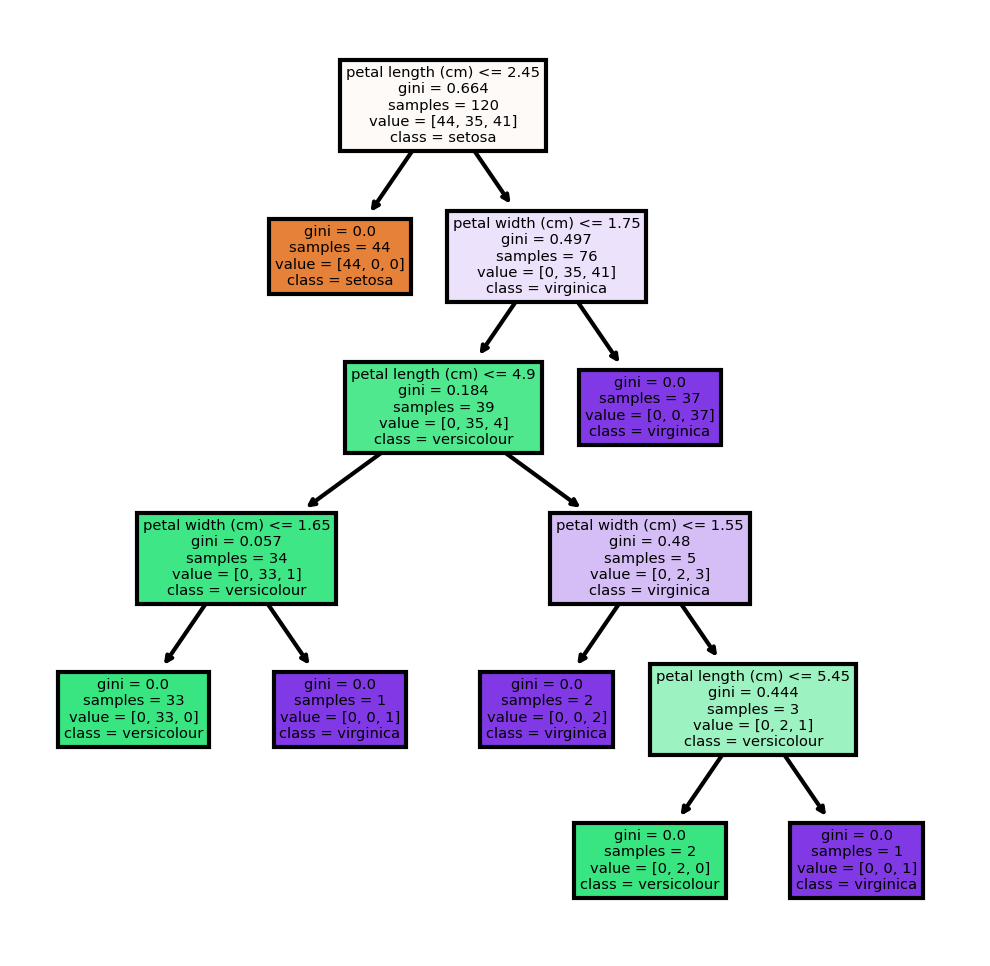

In [50]:
from sklearn import tree
names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
classes= ['setosa','versicolour','virginica']
fig,axes= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dtree, feature_names=names, class_names=classes,filled=True)

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.93      0.97        15
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [57]:
print(confusion_matrix(y_test,pred))

[[ 6  0  0]
 [ 0 14  1]
 [ 0  0  9]]


In [58]:
print(accuracy_score(y_test,pred))

0.9666666666666667


**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**